In [1]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
base_f_loc = '/storage/silver/stfc_cg/hf832176/data/THEMIS/'

# <center> Read in Data </center>

In [3]:
!ls {base_f_loc}*.pkl

ls: cannot access /storage/silver/stfc_cg/hf832176/data/THEMIS/*.pkl: No such file or directory


In [4]:
e_levs = pd.read_pickle(base_f_loc+'tha_sst_energy_levels.pkl')
e_levs.T

,31000.0,41000.0,52000.0,65500.0,93000.0,139000.0,203500.0,293000.0,408000.0,561500.0,719500.0,nan,nan,nan,nan,nan
eV,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15


In [5]:
# Read .pkl files
tha = pd.read_pickle(base_f_loc+'tha.pkl')
thb = pd.read_pickle(base_f_loc+'thb.pkl')
thc = pd.read_pickle(base_f_loc+'thc.pkl')
thd = pd.read_pickle(base_f_loc+'thd.pkl')
the = pd.read_pickle(base_f_loc+'the.pkl')

In [6]:
# reorder columns by ascending energy
cols = ['E_'+str(i+1) for i in range(16)]+tha.columns.tolist()[16:]
tha = tha[cols]
thb = thb[cols]
thc = thc[cols]
thd = thd[cols]
the = the[cols]

# <center> Select Equatorial Data </center>

For analysis, data is limited to the equatorial plane and radial limits about an estimate of the ORB boundary.

Equatorial region: Z = 0 $\pm$ 0.5 R$_E$.

Radial limits: 7 R$_E$ $\leqslant$ R $\leqslant$ 12 R$_E$

Dawn (Dusk): 6 (18) $\pm$ 3 MLT 

In [7]:
def how_much(df):
    equa_r = df[(np.abs(df['pos_z_gsm']/6378.1)<0.5) &
                 (df['r'] >= 7) & (df['r'] <= 10)]
    dawn = equa_r[(3 <= equa_r['mlt']) &
                  (equa_r['mlt'] <= 9)]
    dusk = equa_r[(15 <= equa_r['mlt']) &
                  (equa_r['mlt'] <= 21)]
    print('DF: '+str(len(df)),'EQR: '+str(len(equa_r)),'Dawn: '+str(len(dawn)),'Dusk: '+str(len(dusk)))
    return dawn,dusk

In [8]:
a_dawn, a_dusk = how_much(tha)
b_dawn, b_dusk = how_much(thb)
c_dawn, c_dusk = how_much(thc)
d_dawn, d_dusk = how_much(thd)
e_dawn, e_dusk = how_much(the)

DF: 124801 EQR: 7089 Dawn: 1176 Dusk: 2754
DF: 124801 EQR: 917 Dawn: 339 Dusk: 170
DF: 124801 EQR: 2226 Dawn: 696 Dusk: 432
DF: 124801 EQR: 9344 Dawn: 2794 Dusk: 2909
DF: 124801 EQR: 7246 Dawn: 1734 Dusk: 2020


In [9]:
dawn = pd.concat([a_dawn,b_dawn,c_dawn,d_dawn,e_dawn],axis=0,
                 sort=False,ignore_index=False)
dusk = pd.concat([a_dusk,b_dusk,c_dusk,d_dusk,e_dusk],axis=0,
                 sort=False,ignore_index=False)
print(dawn.shape,dusk.shape)

(6739, 31) (8285, 31)


Note:

Checking the date ranges for Dawn and Dusk shows that they haven't been swapped around during processing.

# <center> Plotting Data </center>

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import seaborn as sbn

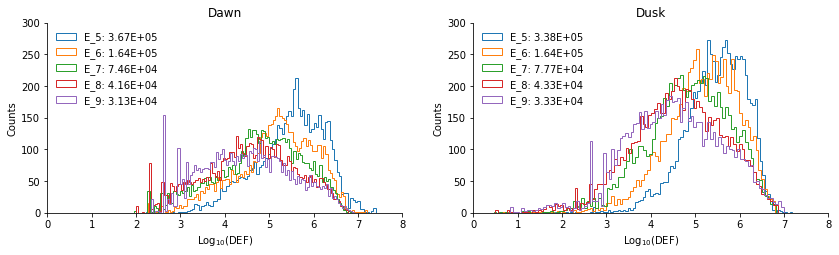

In [11]:
# Plotting distributions of the log10(DEF) for subset energies.
# for subset of energies
plt.figure(figsize=(14,3.5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ylim1 = []
for i in tha.columns[4:9]:
    test1 = dawn[i].replace(0,np.nan).dropna()
        
    hist1 = ax1.hist(np.log10(test1),bins=100,histtype='step',
                    label=i+': '+"{:.2E}".format(test1.median()))
    ylim1.append(hist1[0].max())
    
ax1.set_title('Dawn')
ax1.legend(loc='upper left',frameon=False)
ax1.set_xlim(0,8)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Log$_{10}$(DEF)')
sbn.despine()

############

ylim2 = []
for i in tha.columns[4:9]:
    test2 = dusk[i].replace(0,np.nan).dropna()
        
    hist2 = ax2.hist(np.log10(test2),bins=100,histtype='step',
                     label=i+': '+"{:.2E}".format(test2.median()))
    ylim2.append(hist2[0].max())
        
ax2.set_title('Dusk')
ax2.legend(loc='upper left',frameon=False)
ax2.set_xlim(0,8)
ax2.set_ylabel('Counts')
ax2.set_xlabel('Log$_{10}$(DEF)')
sbn.despine()

ylim = max(ylim1+ylim2)
ax1.set_ylim(0,ylim*1.1)
ax2.set_ylim(0,ylim*1.1)
plt.show()

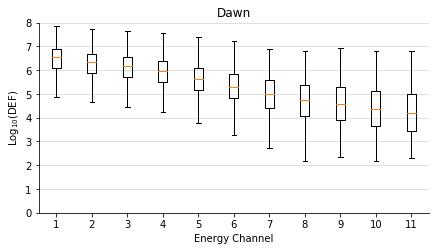

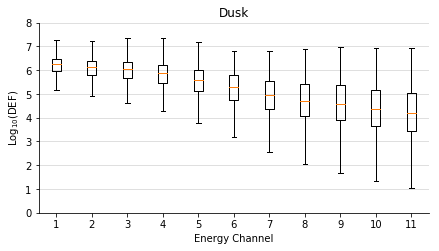

In [12]:
# Plotting boxplots of log10(DEF) for all energies.
plt.figure(figsize=(7,3.5))
test1 = dawn.iloc[:,0:11].replace(0,np.nan).dropna().values
plt.boxplot(np.log10(test1),widths=0.25,sym='')

plt.grid(axis='y',alpha=0.5)

plt.title('Dawn')
plt.ylabel('Log$_{10}$(DEF)')
plt.xlabel('Energy Channel')
plt.ylim(0,8)
sbn.despine()
plt.show()

#################

plt.figure(figsize=(7,3.5))
test2 = dusk.iloc[:,0:11].replace(0,np.nan).dropna().values
plt.boxplot(np.log10(test2),widths=0.25,sym='')

plt.grid(axis='y',alpha=0.5)

plt.title('Dusk')
plt.ylabel('Log$_{10}$(DEF)')
plt.xlabel('Energy Channel')
plt.ylim(0,8)
sbn.despine()
plt.show()

/home/users/hf832176/.conda/envs/tb_env5/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


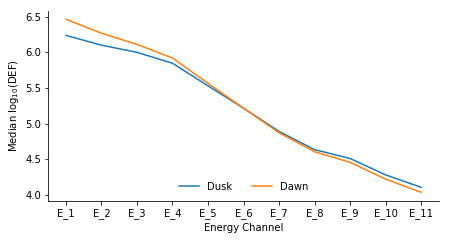

In [13]:
# Plot of median DEF per energy channel
plt.figure(figsize=(7,3.5))

plt.plot([i for i in range(16)],
        [np.log10(dusk[i].median()) for i in dusk.columns[0:16]],
        label='Dusk')
plt.plot([i for i in range(16)],
        [np.log10(dawn[i].median()) for i in dawn.columns[0:16]],
        label='Dawn')

plt.legend(loc='lower center',ncol=2,frameon=False)
plt.ylabel('Median log$_{10}$(DEF)')
plt.xlabel('Energy Channel')

tick_l = [i for i in dusk.columns[0:11]]
t_loc = [i for i in range(11)]
plt.xticks(ticks=t_loc,labels=tick_l)
sbn.despine()
plt.show()

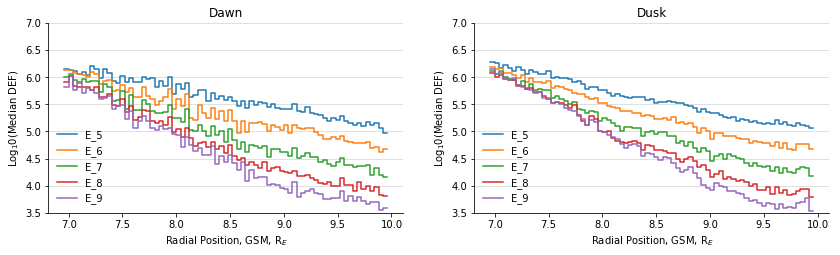

In [14]:
# Plot of the radial dist. of median DEF
r_bins = np.linspace(6,10,101)

plt.figure(figsize=(14,3.5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

for k in tha.columns[4:9]:
    r_def_da = [dawn[(dawn['r'] > i) & (dawn['r'] < j)][k].median()
                for i,j in zip(r_bins[:-1],r_bins[1:])]
    ax1.step(r_bins[:-1],np.log10(r_def_da),label=k)

ax1.grid(axis='y',alpha=0.5)

ax1.set_title('Dawn')
ax1.legend(loc='lower left',frameon=False)
ax1.set_xlabel('Radial Position, GSM, R$_E$')
ax1.set_ylabel('Log$_10$(Median DEF)')
ax1.set_ylim(3.5,7)

###########

for k in tha.columns[4:9]:
    r_def_du = [dusk[(dusk['r'] > i) & (dusk['r'] < j)][k].median()
                for i,j in zip(r_bins[:-1],r_bins[1:])]
    ax2.step(r_bins[:-1],np.log10(r_def_du),label=k)

ax2.grid(axis='y',alpha=0.5)

ax2.set_title('Dusk')
ax2.legend(loc='lower left',frameon=False)
ax2.set_xlabel('Radial Position, GSM, R$_E$')
ax2.set_ylabel('Log$_10$(Median DEF)')
ax2.set_ylim(3.5,7)

sbn.despine()
plt.show()

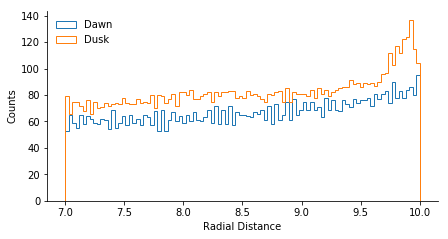

In [15]:
# Plotting distributions of the radial distance.
plt.figure(figsize=(7,3.5))
ax1 = plt.subplot(111)

ax1.hist(dawn['r'],bins=100,histtype='step',
         label='Dawn')
ax1.hist(dusk['r'],bins=100,histtype='step',
         label='Dusk')


ax1.legend(loc='upper left',frameon=False)
ax1.set_ylabel('Counts')
ax1.set_xlabel('Radial Distance')
sbn.despine()

# <center> Kolmogorov-Smirnov Statistic </center>

In [16]:
from scipy.stats import ks_2samp as kss

In [17]:
ks_df = pd.DataFrame(index = [i for i in dusk.columns[0:11]],
                     columns=['stat','p-val'])

ks_df['stat'] = [kss(dawn[i],dusk[i])[0] for i in dusk.columns[0:11]]
ks_df['p-val'] = [kss(dawn[i],dusk[i])[1] for i in dusk.columns[0:11]]
    
ks_df

,stat,p-val
E_1,0.316558,0.000000e+00
E_2,0.242647,3.105088e-191
E_3,0.177900,5.432149e-103
E_4,0.137970,4.077493e-62
E_5,0.102982,8.544001e-35
E_6,0.080004,3.613162e-21
E_7,0.064104,9.625567e-14
E_8,0.061972,7.154481e-13
E_9,0.061972,7.154481e-13
E_10,0.061972,7.154481e-13


# <center> Anderson-Darlin Test </center>

In [18]:
from scipy.stats import anderson_ksamp as adt

In [19]:
ad_df = pd.DataFrame(index = [i for i in dusk.columns[0:11]],
                     columns=['stat','p-val'])

ad_df['stat'] = [adt([dawn[i],dusk[i]])[0] for i in dusk.columns[0:11]]
# ad_df['crit val'] = [adt([dawn[i],dusk[i]])[1] for i in dusk.columns[0:11]]
ad_df['p-val'] = [adt([dawn[i],dusk[i]])[2] for i in dusk.columns[0:11]]
    
ad_df

/home/users/hf832176/.conda/envs/tb_env5/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: p-value floored: true value smaller than 0.001
  after removing the cwd from sys.path.
/home/users/hf832176/.conda/envs/tb_env5/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: p-value floored: true value smaller than 0.001
  after removing the cwd from sys.path.
/home/users/hf832176/.conda/envs/tb_env5/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: p-value floored: true value smaller than 0.001
  after removing the cwd from sys.path.
/home/users/hf832176/.conda/envs/tb_env5/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: p-value floored: true value smaller than 0.001
  after removing the cwd from sys.path.
/home/users/hf832176/.conda/envs/tb_env5/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: p-value floored: true value smaller than 0.001
  after removing the cwd from sys.path.
/home/users/hf832176/.conda/en

,stat,p-val
E_1,30029.449585,0.001
E_2,29752.301820,0.001
E_3,29555.971338,0.001
E_4,29443.868295,0.001
E_5,29377.472124,0.001
E_6,29336.695943,0.001
E_7,29317.233925,0.001
E_8,29309.178965,0.001
E_9,29302.558491,0.001
E_10,29303.107534,0.001
